In [15]:
from pyquantum.qft.qft import Graph
from pyquantum.qft.qft_circuit import QFTCircuit
from pyquantum.circuit.circuit import Circuit
from pyquantum.qubit.gate import *
from numpy import sin

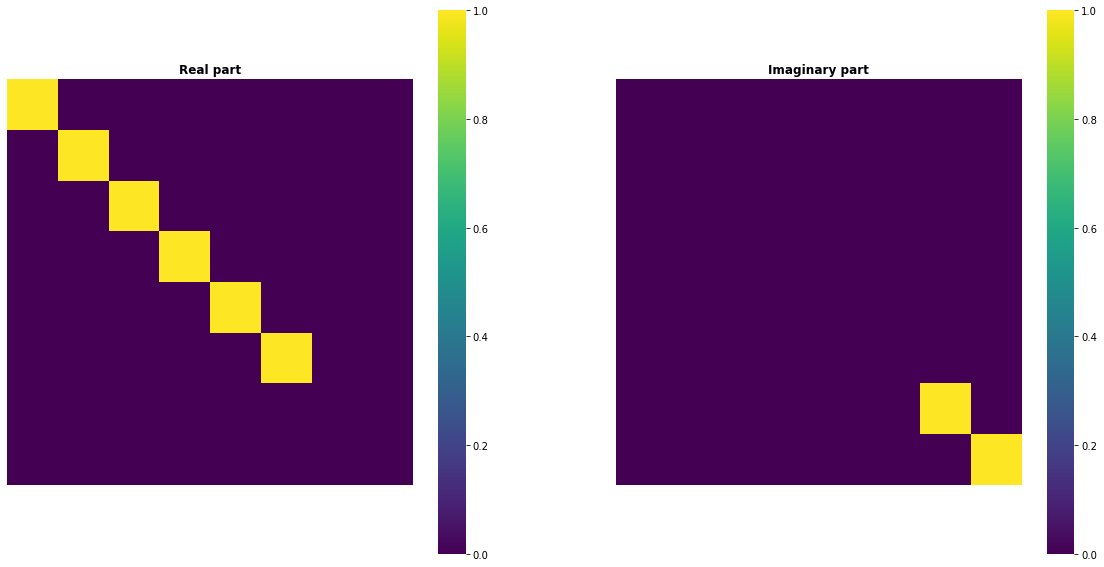

In [16]:
c = Circuit(3)
c.shift(1, 0)

c.heatmap()

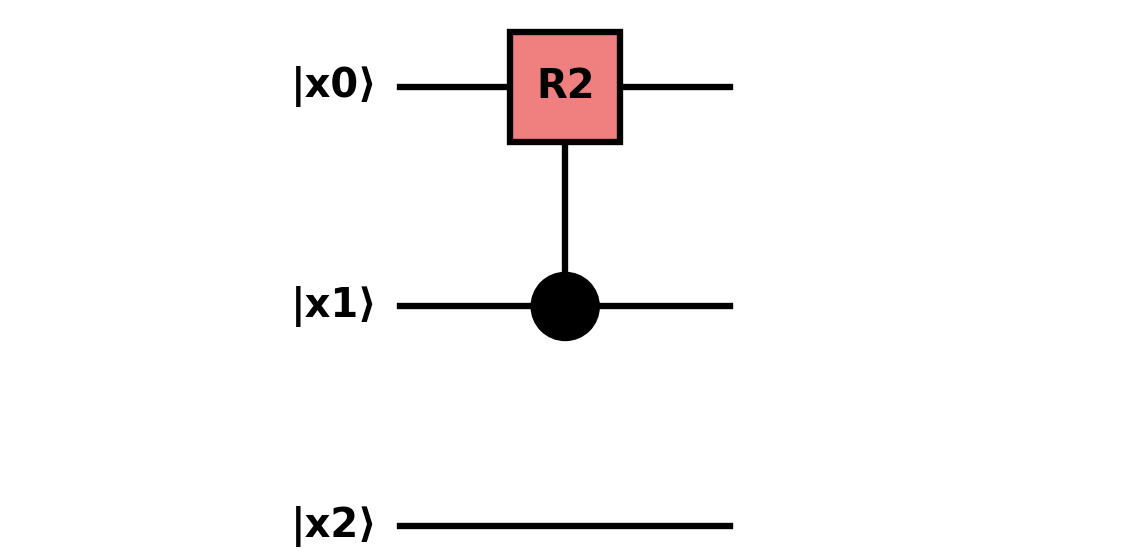

In [17]:
c.draw()

## 3-Qubits System
We know $H = \frac{1}{\sqrt2} \begin{bmatrix}
1 & 1  \\
1 & -1 \\
\end{bmatrix}$.
Let's represent a Hadamard gate applied to the first Qubit: $H_3^0 = H \otimes I_2 \otimes I_2 = \begin{bmatrix}
I_2 &  & I_2 & \\
& I_2 & & I_2 \\
I_2 & & -I_2 & \\
& I_2 & & -I_2 \\
\end{bmatrix}$
Similarly, $H_3^1 = I_2 \otimes H \otimes I_2 = \begin{bmatrix}
I_2 & I_2 & & \\
I_2 & -I_2 & & \\
& & I_2 & I_2 \\
& & I_2 & -I_2 \\
\end{bmatrix}$ and $H_3^2 = I_2 \otimes I_2 \otimes H = \begin{bmatrix}
H & & & \\
& H & & \\
& & H &  \\
& & & H \\
\end{bmatrix}$.

$R_m = \begin{bmatrix}
1 & 0 \\
0 & e^{2i \pi / 2^m} \\
\end{bmatrix}
\\
Z = \begin{bmatrix}
1 & 0  \\
0 & -1 \\
\end{bmatrix}$

Then $P_3^{1, 0} = I_2 \otimes \frac{I_2 + Z}{2} \otimes I_2 + R_2 \otimes \frac{I_2 - Z}{2} \otimes I_2$

$
P_n^{\ control, target} =
\bigotimes_{k=0}^{n-1} \left\{
    \begin{array}{ll}
        \frac{I_2 + Z}{2} & \mbox{if } k = control \\
        I_2 & \mbox{else}
    \end{array}
\right.
+
\bigotimes_{k=0}^{n-1} \left\{
    \begin{array}{lll}
        R_{|control - target| + 1} & \mbox{if } k = target \\
        \frac{I_2 - Z}{2} & \mbox{if } k = control \\
        I_2 & \mbox{else}
    \end{array}
\right.
$

$\frac{I_2 + Z}{2} =
\begin{bmatrix} 1&0\\ 0&0\\ \end{bmatrix}
\\
\frac{I_2 - Z}{2} =
\begin{bmatrix} 0&0\\ 0&1\\ \end{bmatrix}$

$\rangle 0|0 \langle \ = \rangle 0 | \cdot | 0 \langle \ =
\begin{bmatrix} 1\\ 0\\ \end{bmatrix} \cdot \begin{bmatrix} 1&0\\ \end{bmatrix} =
\begin{bmatrix} 1&0\\ 0&0\\ \end{bmatrix}
\\
\rangle 1|1 \langle \ = \rangle 1 | \cdot | 1 \langle \ =
\begin{bmatrix} 0\\ 1\\ \end{bmatrix} \cdot \begin{bmatrix} 0&1\\ \end{bmatrix} =
\begin{bmatrix} 0&0\\ 0&1\\ \end{bmatrix}$

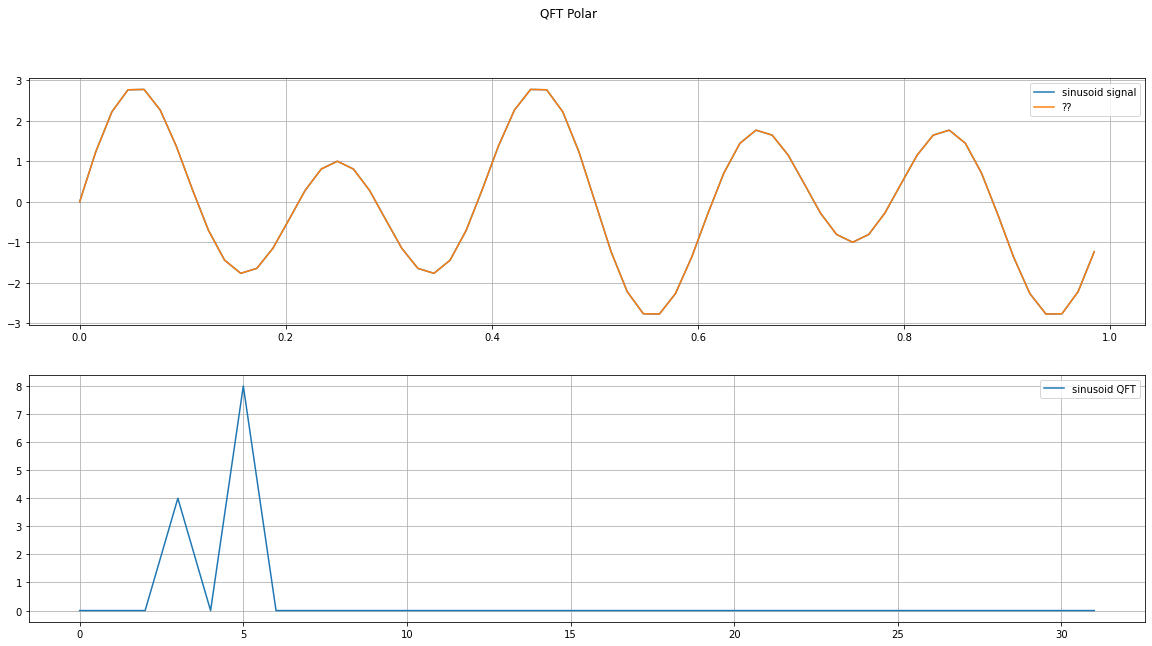

In [18]:
graph = Graph('QFT Polar')
graph.sinusoid(params={sin: {5: 2, 3: 1}}, n_qubits=6)
graph.show()

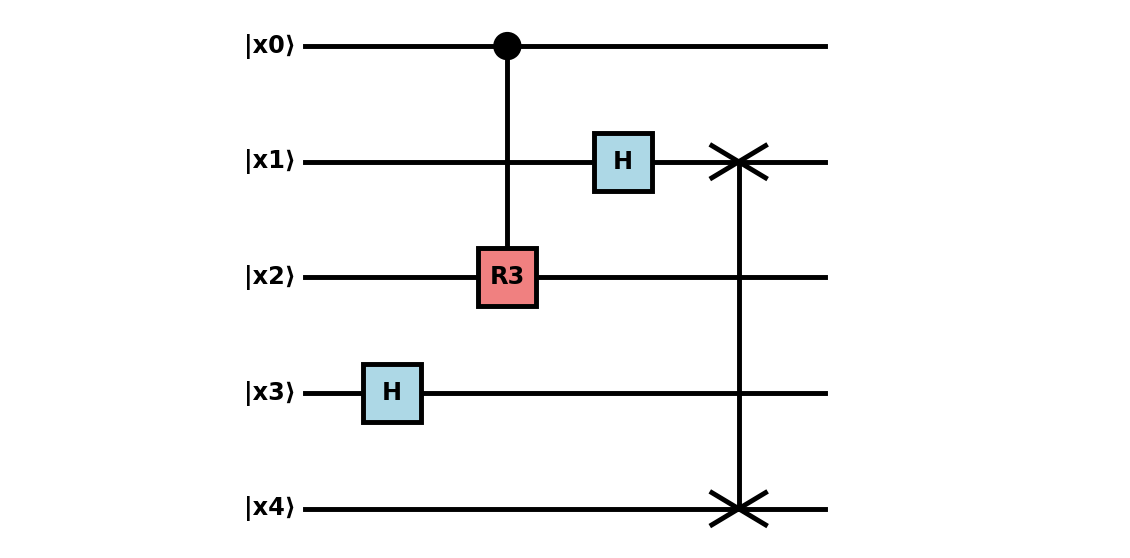

In [19]:
circuit5 = Circuit(5)
circuit5.hadamard(3)
circuit5.shift(0, 2)
circuit5.hadamard(1)
circuit5.swap(1, 4)
circuit5.draw()

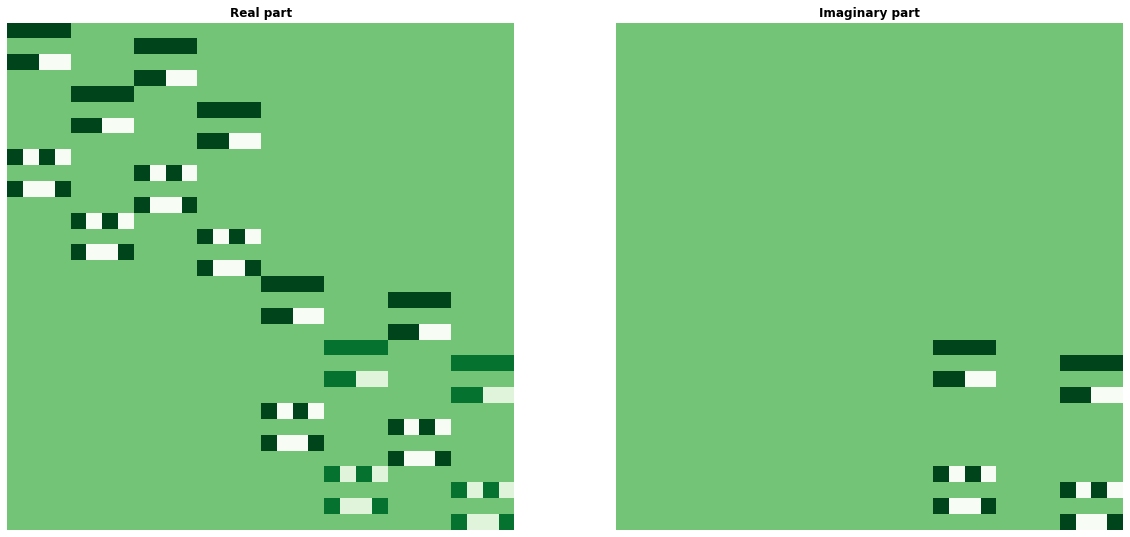

5-Qubits circuit

In [20]:
circuit5.set_settings(cmap='Greens', cbar=False)

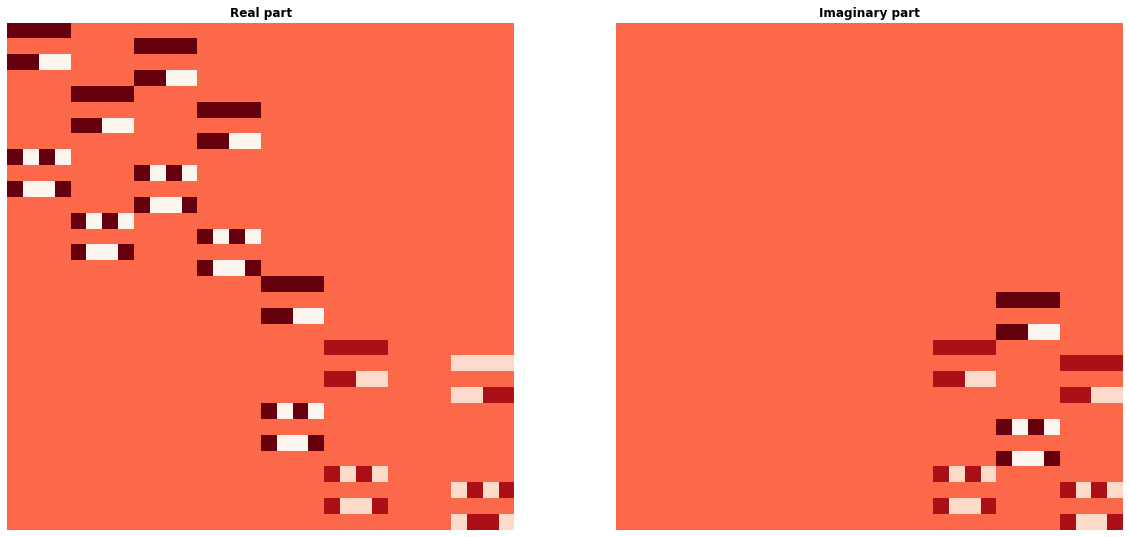

5-Qubits circuit

In [21]:
circuit5.shift(0, 1)
circuit5.set_settings(cmap='Reds')

In [22]:
circuit5.gates

[['hadamard', 3],
 ['shift', 0, 2],
 ['hadamard', 1],
 ['swap', 1, 4],
 ['shift', 0, 1]]

In [23]:
circuit5.gates.pop(1)

['shift', 0, 2]

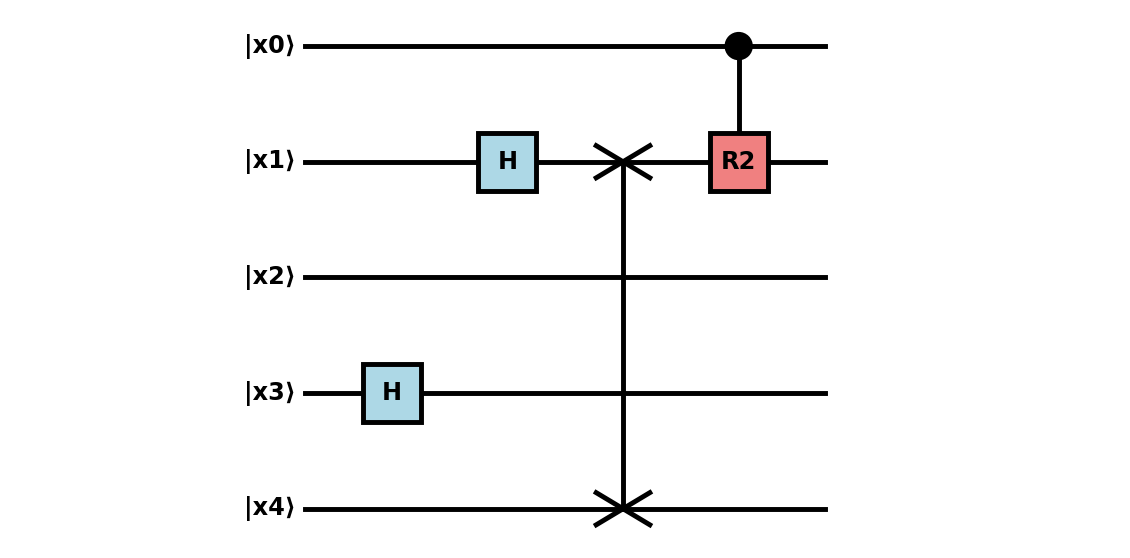

In [24]:
circuit5.draw()

In [29]:
circuit5.gates

[['hadamard', 3], ['hadamard', 1], ['swap', 1, 4], ['shift', 0, 1]]

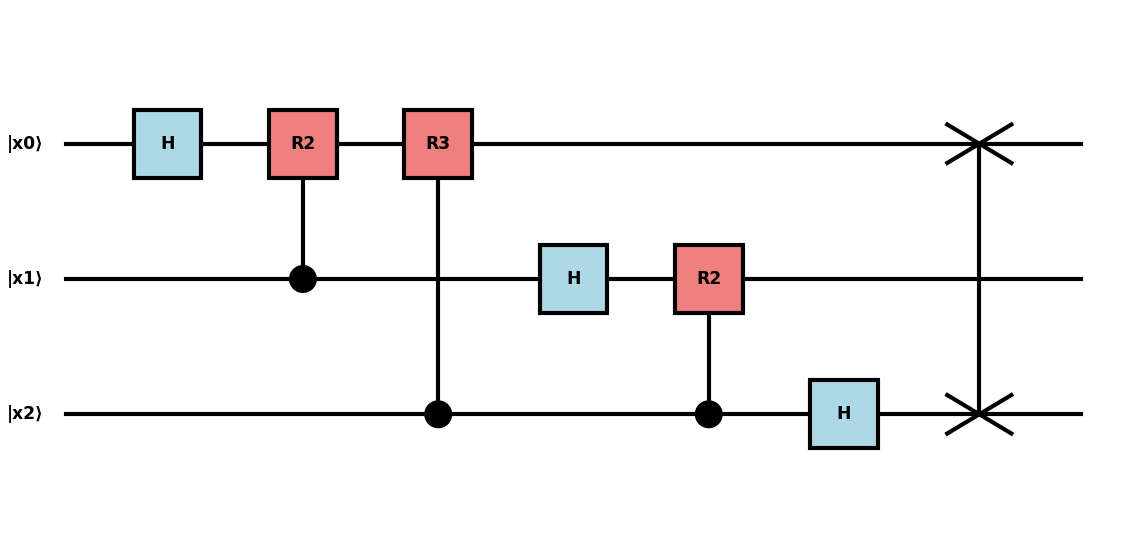

In [25]:
qft3 = QFTCircuit(3)
qft3.draw()

## Implementation
Example with the Hadamard Gate:
```
def hadamard(self, target):
    matrix = self.conk([self.h if k is target else self.i for k in range(self.n_qubits)])
    self.matrices.append(matrix)
    self.gates.append(['hadamard', target])
    return self
```

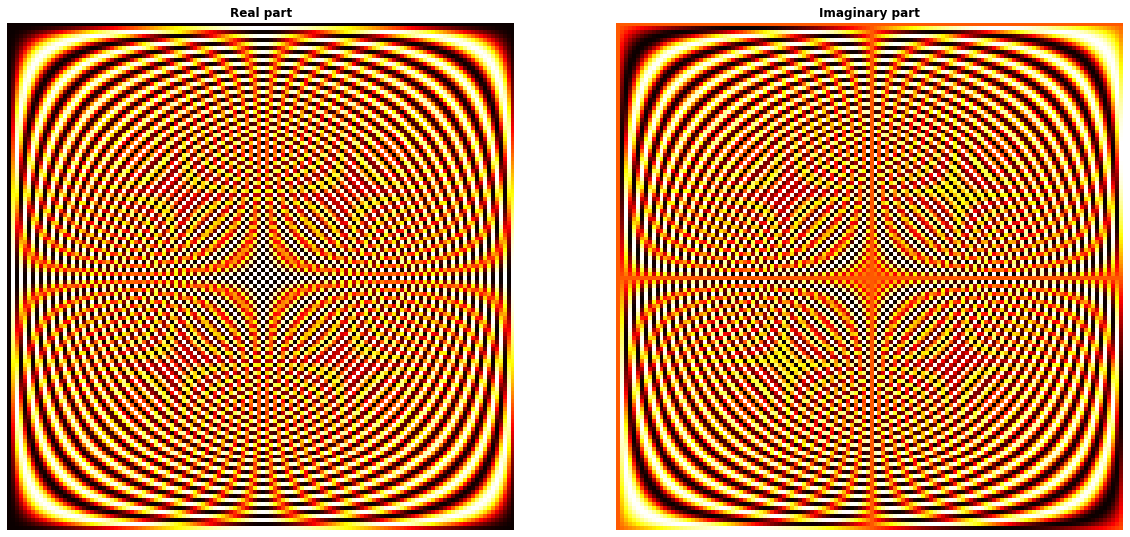

In [26]:
qft7 = QFTCircuit(7)
# qft7.swap(0, 1)
# qft7.swap(0, 1)
qft7.set_settings(cmap='hot_r', cbar=False)
qft7.heatmap()

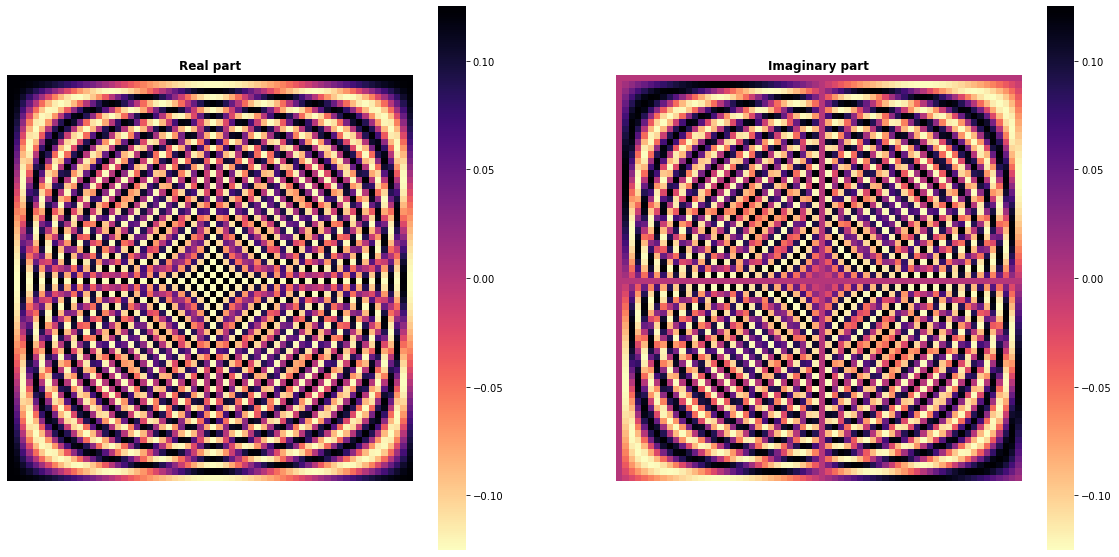

In [27]:
QFT = qft_matrix(n_qubits=6)
Circuit().set_settings(cbar=True, cmap='magma_r').heatmap(QFT)

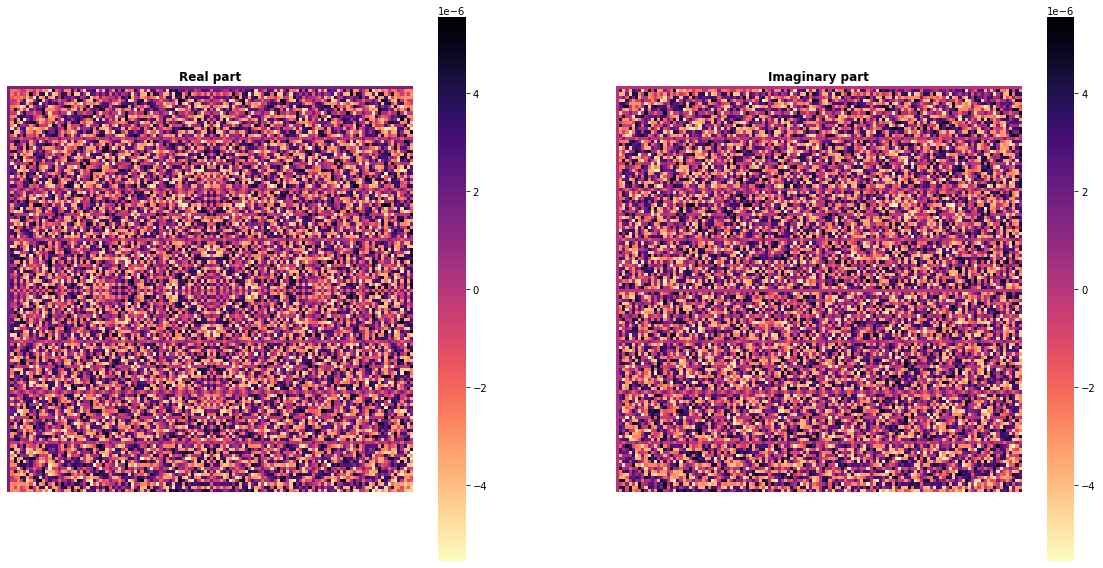

In [28]:
N_QUBITS = 7
QFT_DIRECT = qft_matrix(n_qubits=N_QUBITS)
QFT_CONSTRUCT = QFTCircuit(n_qubits=N_QUBITS).matrix
Circuit().set_settings(cbar=True, cmap='magma_r').heatmap(QFT_DIRECT - QFT_CONSTRUCT)